In [21]:
import h5py
import astropy.units as u
import numpy as np
fn = '/Users/wasi/Downloads/galaxy_galplane_l50_b0.hdf'

avail_fields = [
    'RA', 'DEC', 'longitude', 'latitude', 'distance', 'distance_mod',
    'age', 'mass', 'metallicity', 'vx', 'vy', 'vz',
    # Castor bands
    'CASTOR_u_app', 'CASTOR_uv_app', 'CASTOR_g_app',
    'CASTOR_u_split_bb_app', 'CASTOR_uv_split_bb_app',
    # LSST bands
    'LSST_u_app', 'LSST_g_app', 'LSST_r_app',
    'LSST_i_app', 'LSST_z_app', 'LSST_y_app',
    # WFIRST bands
    'R062_app', 'Z087_app', 'Y106_app', 'J129_app', 'W146_app',
    'H158_app', 'F184_app'
]

data = dict()

with h5py.File(fn, 'r') as datafile:
    for key in avail_fields:
        dataset = datafile[key]
        data[key] = dataset[:]
        if 'unit' in dataset.attrs:
            data[key] <<= u.Unit(dataset.attrs['unit'])


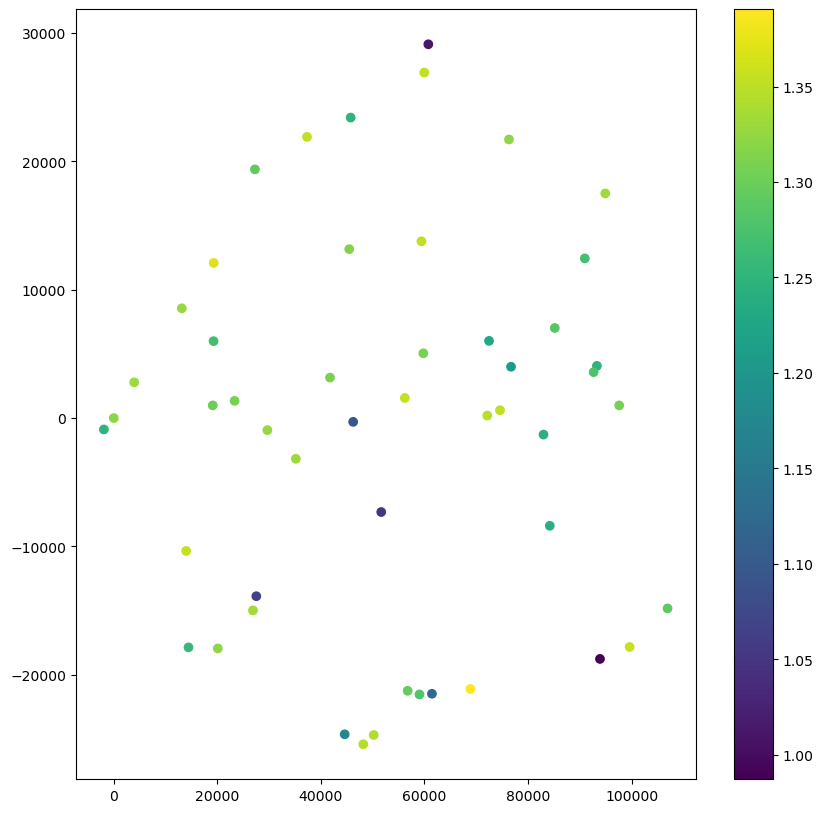

NotImplementedError: cannot write Quantities to file.  Write array with q.value.tofile(...)

In [25]:
data.keys()
cut_ra=data.get('RA')[:50]
cut_dec=data.get('DEC')[:50]
cut_g_mag=data.get('CASTOR_g_app')[:50]
# The above values of the cut pperformed are in degrees. Covert into arcseconds
cut_ra_arcsec=cut_ra.to(u.arcsec)
cut_dec_arcsec=cut_dec.to(u.arcsec)

# Now use the pixel scale to convert the ra and dec into pixel values. We use a pixel scale of 0.1 arcsec/pixel. Then add the magnitude values corresponding to index of the pixel values.

pixel_scale=0.1*u.arcsec/u.pixel
cut_ra_pixel=cut_ra_arcsec/pixel_scale
cut_dec_pixel=cut_dec_arcsec/pixel_scale

# print cut_ra_pixel and cut_dec_pixel to get the pixel values of ra and dec
#print(cut_ra_pixel)
#print(cut_dec_pixel)

# Now take the middle values of both cut_ra_pixel and cut_dec_pixel and that will be the cente of the image. Then take the difference of the pixel values of ra and dec from the center values to get the pixel values of the ra and dec in the image.

center_ra_pixel=cut_ra_pixel[25]
center_dec_pixel=cut_dec_pixel[25]
cut_ra_pixel_centered=cut_ra_pixel-center_ra_pixel
cut_dec_pixel_centered=cut_dec_pixel-center_dec_pixel

# do a log scale of the pixel values of the magnitude values
cut_g_mag_log=np.log10(cut_g_mag)

# Now we have the pixel values of ra, dec and the log scale of the magnitude values. We can now plot the image using the pixel values of ra, dec and the log scale of the magnitude values.

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(cut_ra_pixel_centered,cut_dec_pixel_centered,c=cut_g_mag_log)
plt.colorbar()
plt.show()







In [ ]:
# I have the pixel values in x,y and the star magnitude. The x = cut_ra_pixel_centered y= cut_dec_pixel_centered,mag =cut_g_mag_log. All the t